## Capstone I:  NHANES 2015-2016 Data Wrangling

Our objective is to identify ways to reduce hospital readmission rates related to cardiovascular disease in adults. 

The first step in completing this project is data collection and cleaning. The following are the steps that were taken.

1. Downloaded the datasets of interest from the Centers for Disease Control and Prevention website: https://wwwn.cdc.gov/nchs/nhanes/ContinuousNhanes/Default.aspx?BeginYear=2015.


2. Imported pandas and numpy into the Python notebook, read the SAS files into pandas dataframes, and merged the datasets of interest.


3. Examined the data
    - Noted shape and size of dataset.
    - Made the dataset smaller by creating a new dataset only containing columns of main interest.
    - Noted column names and edited to make more user-friendly.
    - Noted data types within the different columns, and edited when needed.
    - Examined null values and outliers by observing data summaries and creating boxplots and histograms.
        - Null values: Many of the columns contained null values ('NaN'). We kept these values in the dataset, because not all questions in the questionnaires and all laboratory values were taken from all participants. Numerical values that were similar to null (i.e., where response was 'refused' or 'don't know', were replaced with 'NaN'. Categorical variables (represented in the dataset by numbers) with the responses 'refused' and 'don't know' were left alone for now.
        - Outliers:  Since the dataset is relatively small in regard to participants who have had >1 overnight hospital stay in the last year, and also in regard to participants with cardiovascular disease, we left all other outliers in the dataset.


### Importing pandas library (for data manipulation and analysis), as well as numpy and matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### We imported the SAS data files into pandas dataframes, then merged the dataframes together.


In [2]:

acq = pd.read_sas('NHANES/ACQ_I_acculturation.XPT')
bmx = pd.read_sas('NHANES/BMX_I_body_measures.xpt')
demo = pd.read_sas('NHANES/DEMO_I_demographics.XPT')
diq = pd.read_sas('NHANES/DIQ_I_diabetes.xpt')
dpq = pd.read_sas('NHANES/DPQ_I_depression.xpt')
dxx = pd.read_sas('NHANES/DXX_I_dexa.xpt')
fsq = pd.read_sas('NHANES/FSQ_I_food_security.xpt')
huq = pd.read_sas('NHANES/HUQ_I_hospitalization.XPT')
hiq = pd.read_sas('NHANES/HIQ_I_health_insurance.xpt')
mcq = pd.read_sas('NHANES/MCQ_I_medical_conditions.XPT')
glu = pd.read_sas('NHANES/GLU_I_glucose.XPT')
hdl = pd.read_sas('NHANES/HDL_I_hdl.XPT')
ldltg = pd.read_sas('NHANES/TRIGLY_I_ldl_tg.XPT')
tc = pd.read_sas('NHANES/TCHOL_I_tc.XPT')
hgba1c = pd.read_sas('NHANES/GHB_I_hgba1c.XPT')
cbc = pd.read_sas('NHANES/CBC_I.XPT')
bioprofile = pd.read_sas('NHANES/BIOPRO_I.XPT')
kiq = pd.read_sas('NHANES/KIQ_U_I.XPT')

#Merging the 15 dataframes together into one large dataframe
nhanes = acq.merge(bmx, on='SEQN', how='outer') \
.merge(demo, on='SEQN', how='outer') \
.merge(diq, on='SEQN', how='outer').merge(dpq, on='SEQN', how ='outer') \
.merge(dxx, on='SEQN', how='outer').merge(fsq, on='SEQN', how='outer') \
.merge(huq, on='SEQN', how='outer').merge(hiq, on='SEQN', how='outer') \
.merge(mcq, on='SEQN', how='outer').merge(glu, on='SEQN', how='outer')\
.merge(hdl, on='SEQN', how='outer').merge(ldltg, on='SEQN', how='outer')\
.merge(tc, on='SEQN', how='outer').merge(hgba1c, on='SEQN', how='outer')\
.merge(cbc, on='SEQN', how='outer').merge(bioprofile, on='SEQN', how='outer')\
.merge(kiq, on= 'SEQN', how='outer')


In [3]:
nhanes.head()

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,BMDSTATS,BMXWT,BMIWT,BMXRECUM,...,KIQ010,KIQ042,KIQ430,KIQ044,KIQ450,KIQ046,KIQ470,KIQ050,KIQ052,KIQ480
0,83732.0,1.0,NaN,NaN,NaN,NaN,1.0,94.8,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,5.397605e-79
1,83733.0,NaN,NaN,9.0,NaN,NaN,1.0,90.4,NaN,NaN,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,5.397605e-79
2,83734.0,1.0,NaN,NaN,NaN,NaN,1.0,83.4,NaN,NaN,...,1.0,2.0,NaN,2.0,NaN,2.0,NaN,NaN,NaN,1.000000e+00
3,83735.0,1.0,NaN,NaN,NaN,NaN,1.0,109.8,NaN,NaN,...,1.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,1.0,1.000000e+00
4,83736.0,1.0,NaN,NaN,NaN,NaN,3.0,55.2,NaN,NaN,...,NaN,2.0,NaN,1.0,2.0,2.0,NaN,2.0,1.0,1.000000e+00


In [4]:
nhanes.shape

(9971, 479)

#### The dataset has 9971 rows and 479 columns (features).

#### After careful examination of the data descriptions (via the 'Doc_File' on NHANES website), and based on our knowledge/experience in public health, social sciences, and patient care,  we decided that we will explore the following features in the dataframe. The variable names for each feature (enclosed in quotation) will be the finalized name of said variable. Original variable names set by NHANES are in capital letters.

'seqn' = SEQN = study participant ID

'gender' = RIAGENDR = participant's gender: 1=Male, 2=Female, NaN = Missing

'age' = RIDAGEYR = Current age of participant: Range of values = 0-79 years, 80=80 years and older, NaN = Missing

'ethnicity' = RIDRETH3 = Race/Ethnicity:
    1=Mexican American, 2=Other Hispanic, 3=Non-Hispanic White, 4=Non-Hispanic Black, 6=Non-Hispanic Asian,
    7=Other race, including multi-racial, NaN = Missing

'lang_hisp' = ACD040 = Language(s) spoken at home Hispanics:
    1= Spanish only, 2=More spanish than English, 3= Both equally, 4=More English than Spanish
    5= Only English, 7= Refused, 9=Don't know, NaN = Missing
         
'lang_nhb_nhw' = ACD011A = Language(s) spoken at home (Non-Hispanic white, Non-Hispanic black, or other race including multi-racial):
    1 = English, 77 = Refused, 99 = Don't know, NaN = Missing

lang_asian' = ACD110 = Language(s) spoken at home - Asians: 
   1= Only non-English language, 2=More non-English than English, 3= Both equally, 4=More English than non-English,
   5= Only English, 7= Refused, 9=Don't know, NaN = Missing
        
'bmi' = BMXBMI = Body Mass Index: Range of values = 11.5-67.3, NaN = Missing

'depr1 - depr10' = DPQ010 - DPQ100 = Depression screening questions from 9-item depression screening instrument, 
    'The Patient Health Questionnaire'. A total score is based on the sum all responses, and Ranges from 0 to 27. 
    Major depression and depression severity can be assessed using pre-defined cut-point references)
    Possible choices for each question: 
    0 = Not at all, 1= several days, 2=more than half the days,3=Nearly every day, 7=Refused, 9=Don't know, NaN = Missing, 
    Sum of DPQ questionnaire >9 indicates lowest levels of depression.

'bodyfatpct' = DXDTOPF = Percent Body Fat: Range of values: 11.7 to 54.7, NaN = Missing

'foodsec' = FSD032B = The food that {I/we} bought just didn't last, and {I/we} didn't have enough money to get more food:
    1= Often True, 2= Sometimes true, 3=Never True, 7=Refused, 9=Don't know, NaN = Missing
 
#### Features that indicate disease diagnosis ('Have you ever been told by a doctor or health professional that you have...)  
    1=Yes,2=No, 3=Borderline, 7=Refused, 9= Don't know, NaN = Missing  

'diabetes' = DIQ010  
'prediabetes' = DIQ160  
'asthma' = MCQ010  
'arthritis' = MCQ160a  
'gout' = MCQ160n  
'chf' = MCQ160b  
'chd' = MCQ160c  
'angina' = MCQ160d  
'heartattack' = MCQ160e  
'stroke' = MCQ160f  
'emphysema' =MCQ160g  
'thyroid' = MCQ160m  
'bronchitis' = MCQ160k  
'liver' = MCQ160l  
'copd' = MCQ160o  
'jaundice' = MCQ203  
'cancer' = MCQ220  
'kidney' = KIQ022  

#### Features indicating disease age of onset:  
(Range of values = 0-79 years, 80=80 years and older, 777=Refused, 999=Don't know, 77777=Refused, 99999=Don't know, NaN = Missing)

'asthma_age' = MCQ025  
'arthritis_age' = MCQ180a  
'gout_age' = MCQ180n  
'diabetes_age' = DID040  
'chf_age' = MCQ180b  
'chd_age' = MCQ180c  
'angina_age' = MCQ180d  
'mi_age' = MCQ180e  
'cva_age' = MCQ180f  
'emphysema_age' = MCQ180g  
'thyroid_age' = MCQ180m  
'bronchitis_age' = MCQ180k  
'liver_age' = MCQ180l  
'jaundice_age' = MCQ206   
'ca_bladder_age' = MCQ240a  
'ca_testicular_age' = MCQ240aa  
'ca_blood_age' =MCQ240b  
'ca_thyroid_age' =MCQ240bb  
'ca_bone_age' =MCQ240c  
'ca_uterine_age' =MCQ240cc  
'ca_brain_age' =MCQ240d   
'ca_breast_age' =MCQ240e  
'ca_cervical_age' =MCQ240f  
'ca_colon_age' =MCQ240g  
'ca_esophageal_age' =MCQ240h  
'ca_gallbladder_age' =MCQ240i   
'ca_kidney_age' =MCQ240j  
'ca_larynx_age' =MCQ240k  
'ca_leukemia_age' =MCQ240l  
'ca_liver_age' =MCQ240m  
'ca_lung_age' =MCQ240n  
'ca_hodgkins_age' =MCQ240o  
'ca_melanoma_age' =MCQ240p  
'ca_mouth_age' =MCQ240q  
'ca_nervous_age' =MCQ240r  
'ca_ovarian_age' =MCQ240s  
'ca_pancreatic_age' =MCQ240t  
'ca_prostate_age' =MCQ240u  
'ca_rectal_age' =MCQ240v  
'ca_skin_nonmelanoma_age' = MCQ240p  
'ca_skin_unknown_age' =MCQ240x  
'ca_softtissue_age' =MCQ240y  
'ca_stomach_age' =MCQ240z 

'numhosp' = HUD080 = Number of hospital stays (1 or more nights/stay)in the last year: 
    1=1, 2=2, 3=3, 4=4, 5=5, 6= 6 or greater, 77777=Refused, 99999=Don't know, NaN = Missing

'fglucose' = LBXGLU = Fasting plasma glucose(mg/dl): Range of values = 21-479, NaN = Missing

'hdl' = LBDHDD = Fasting Direct HDL cholesterol(mg/dl): Range of values = 6-226, NaN = Missing

'tg' = LBXTR = Fasting triglycerides(mg/dl): Range of values = 14-2141, NaN = Missing

'ldl' = LBDLDL = Fasting LDL cholesterol(mg/dl): Range of values = 23-277, NaN = Missing

'tchol' = LBXTC = Fasting Total Cholesterol(mg/dl): Range of values = 77-545, NaN = Missing

'hgba1c' = LBXGH = Glycated hemoglobin (Hemoglobin A1c) (%): Range of values = 3.8-17, NaN = Missing


CBC: complete blood count labs:

'wbc' = LBXWBCSI - White blood cell count (1000 cells/uL)

'lymphocytes' = LBXLYPCT - Lymphocyte percent (%)

'monocytes' = LBXMOPCT - Monocyte percent (%)

'neutrophils' = LBXNEPCT - Segmented neutrophils percent (%)

'eosinophils' = LBXEOPCT - Eosinophils percent (%)

'basophils' = LBXBAPCT - Basophils percent (%)

'rbc' = LBXRBCSI - Red blood cell count (million cells/uL)

'hgb' = LBXHGB - Hemoglobin (g/dL)

'hct' = LBXHCT - Hematocrit (%)

'mcv' = LBXMCVSI - Mean cell volume (fL)

'mchgb' = LBXMCHSI - Mean cell hemoglobin (pg)

'rdw' = LBXRDW - Red cell distribution width (%)

'plt' = LBXPLTSI - Platelet count (1000 cells/uL)

'mpv' = LBXMPSI - Mean platelet volume (fL)


BIOPROFILE labs:

'albumin' = LBXSAL - Albumin, refrigerated serum (g/dL)

'alp' = LBXSAPSI - Alkaline Phosphatase (ALP) (IU/L)

'ast' = LBXSASSI - Aspartate Aminotransferase (AST) (IU/L)

'alt' = LBXSATSI - Alanine Aminotransferase (ALT) (IU/L)

'bun' = LBXSBU - Blood Urea Nitrogen (mg/dL)

'bicarbonate' = LBXSC3SI - Bicarbonate (mmol/L)

'calcium' = LBXSCA - Total Calcium (mg/dL)

'cholesterol' = LBXSCH - Cholesterol, refrigerated serum (mg/dL)

'cpk' = LBXSCK - Creatine Phosphokinase (CPK) (IU/L)

'chloride' = LBXSCLSI - Chloride (mmol/L)

'creatinine' = LBXSCR - Creatinine, refrigerated serum (mg/dL)

'globulin' = LBXSGB - Globulin (g/dL)

'glucose' = LBXSGL - Glucose, refrigerated serum (mg/dL)

'ggt' = LBXSGTSI - Gamma Glutamyl Transferase (GGT) (U/L)

'iron' = LBXSIR - Iron, refrigerated serum (ug/dL)

'potassium' = LBXSKSI - Potassium (mmol/L)

'ldh' = LBXSLDSI - Lactate Dehydrogenase (LDH) (U/L)

'sodium' = LBXSNASI - Sodium (mmol/L)

'osmolality' = LBXSOSSI - Osmolality (mmol/Kg)

'phosphorus' = LBXSPH - Phosphorus (mg/dL)

tbili = LBXSTB - Total Bilirubin (mg/dL)

'protein' = LBXSTP - Total Protein (g/dL)

'triglycerides' = LBXSTR - Triglycerides, refrig serum (mg/dL)

'uricacid' = LBXSUA - Uric acid (mg/dL)


#### Next, we select only the columns of interest and create an updated (abridged) dataframe.

In [5]:

nhanes = nhanes[['SEQN','RIDAGEYR', 'RIAGENDR', 'RIDRETH3', 'ACD040', 'ACD011A', 'ACD110', 'BMXBMI', \
                   'DPQ010','DPQ020','DPQ030','DPQ040','DPQ050','DPQ060','DPQ070','DPQ080','DPQ090','DPQ100', \
                 'DXDTOPF','FSD032B','DIQ010', 'DIQ160','MCQ010','MCQ160A',\
                 'MCQ160N', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E','MCQ160F', 'MCQ160G','MCQ160M',\
                 'MCQ160K', 'MCQ160L','MCQ160O','MCQ203', 'MCQ220', 'KIQ022',\
                 'MCQ025','MCQ180A','MCQ180N','DID040','MCQ180B','MCQ180C','MCQ180D','MCQ180E','MCQ180F',\
                 'MCQ180G','MCQ180M','MCQ180K','MCQ180L','MCQ206','MCQ240A','MCQ240AA','MCQ240B','MCQ240BB',\
                 'MCQ240C','MCQ240CC','MCQ240D','MCQ240E','MCQ240F','MCQ240G','MCQ240H','MCQ240I','MCQ240J',\
                 'MCQ240K','MCQ240L','MCQ240M','MCQ240N','MCQ240O','MCQ240P','MCQ240Q','MCQ240R','MCQ240S',\
                 'MCQ240T','MCQ240U','MCQ240V','MCQ240P','MCQ240X','MCQ240Y','MCQ240Z','HUD080',\
                 'LBXGLU','LBDHDD','LBXTR', 'LBDLDL','LBXTC', 'LBXGH', 'LBXWBCSI', 'LBXLYPCT', 'LBXMOPCT', 'LBXNEPCT',\
                 'LBXEOPCT', 'LBXBAPCT', 'LBXRBCSI', 'LBXHGB', 'LBXHCT', 'LBXMCVSI', 'LBXMCHSI', 'LBXMC', 'LBXRDW',\
                 'LBXPLTSI', 'LBXMPSI', 'LBXSAL', 'LBXSAPSI', 'LBXSASSI', 'LBXSATSI', 'LBXSBU', 'LBXSC3SI', 'LBXSCA',\
                 'LBXSCH', 'LBXSCK', 'LBXSCLSI', 'LBXSCR', 'LBXSGB', 'LBXSGL', 'LBXSGTSI', 'LBXSIR', 'LBXSKSI',\
                 'LBXSLDSI', 'LBXSNASI', 'LBXSOSSI', 'LBXSPH', 'LBXSTB', 'LBXSTP', 'LBXSTR', 'LBXSUA']]

#Confirming pandas dataframe has been created
print(type(nhanes))


<class 'pandas.core.frame.DataFrame'>


In [6]:
pd.set_option('display.max_columns', None)
nhanes.shape

(9971, 127)

#### The number of columns has been reduced to 127.

In [7]:
# Quick exploration of the dataframe.
print(nhanes.head())
print(nhanes.tail())

      SEQN  RIDAGEYR  RIAGENDR  RIDRETH3  ACD040  ACD011A  ACD110  BMXBMI  \
0  83732.0      62.0       1.0       3.0     NaN      1.0     NaN    27.8   
1  83733.0      53.0       1.0       3.0     NaN      NaN     NaN    30.8   
2  83734.0      78.0       1.0       3.0     NaN      1.0     NaN    28.8   
3  83735.0      56.0       2.0       3.0     NaN      1.0     NaN    42.4   
4  83736.0      42.0       2.0       4.0     NaN      1.0     NaN    20.3   

         DPQ010        DPQ020        DPQ030        DPQ040        DPQ050  \
0  5.397605e-79  5.397605e-79  5.397605e-79  1.000000e+00  5.397605e-79   
1  1.000000e+00  5.397605e-79  5.397605e-79  5.397605e-79  1.000000e+00   
2  5.397605e-79  5.397605e-79  5.397605e-79  1.000000e+00  5.397605e-79   
3  1.000000e+00  1.000000e+00  2.000000e+00  2.000000e+00  1.000000e+00   
4  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  3.000000e+00   

         DPQ060        DPQ070        DPQ080        DPQ090        DPQ100  \
0  5.397605

In [8]:
#Examining datatypes, column types, non-null values, and memory usage.

nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9971 entries, 0 to 9970
Columns: 127 entries, SEQN to LBXSUA
dtypes: float64(127)
memory usage: 9.7 MB


In [9]:
nhanes.MCQ160D.value_counts()

2.0    5568
1.0     133
9.0      17
7.0       1
Name: MCQ160D, dtype: int64

In [10]:
#Renaming the columns of the dataframe, so that it is easier to work with and understand the variables of interest.

nhanes.columns = ['seqn', 'age', 'gender', 'ethnicity', 'lang_hisp', 'lang_nhb_nhw', 'lang_asian', 'bmi',\
                 'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6','depr7', 'depr8', 'depr9', 'depr10',\
                  'bodyfatpct', 'foodsec',\
                  'diabetes', 'prediabetes', 'asthma','arthritis','gout','chf','chd', 'angina','mi','cva',\
                  'emphysema','thyroid','bronchitis','liver','copd','jaundice','cancer', 'kidney',\
                  'asthma_age','arthritis_age','gout_age','diabetes_age','chf_age','chd_age','angina_age',\
                  'mi_age','cva_age','emphysema_age','thyroid_age','bronchitis_age','liver_age','jaundice_age',\
                  'ca_bladder_age','ca_testicular_age','ca_blood_age','ca_thyroid_age','ca_bone_age','ca_uterine_age',\
                  'ca_brain_age','ca_breast_age','ca_cervical_age','ca_colon_age','ca_esophageal_age',\
                  'ca_gallbladder_age','ca_kidney_age','ca_larynx_age','ca_leukemia_age','ca_liver_age','ca_lung_age',\
                  'ca_hodgkins_age','ca_melanoma_age','ca_mouth_age','ca_nervous_age','ca_ovarian_age',\
                  'ca_pancreatic_age','ca_prostate_age','ca_rectal_age','ca_skin_nonmelanoma_age','ca_skin_unknown_age',\
                  'ca_softtissue_age','ca_stomach_age',\
                  'numhosp',\
                  'fglucose', 'hdl','tg', 'ldl', 'tchol','hgba1c', 'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
                  'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', 'alt', 'bun',\
                  'bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose', 'ggt', 'iron',\
                  'potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides', 'uricacid']


In [11]:
pd.options.display.max_rows = 200

nhanes.isna().sum()

seqn                          0
age                           0
gender                        0
ethnicity                     0
lang_hisp                  7089
lang_nhb_nhw               5007
lang_asian                 8987
bmi                        1215
depr1                      4807
depr2                      4807
depr3                      4807
depr4                      4809
depr5                      4809
depr6                      4809
depr7                      4810
depr8                      4810
depr9                      4810
depr10                     6392
bodyfatpct                 5373
foodsec                     322
diabetes                    396
prediabetes                3926
asthma                      396
arthritis                  4252
gout                       4252
chf                        4252
chd                        4252
angina                     4252
mi                         4252
cva                        4252
emphysema                  4252
thyroid 

### We elect to not remove null values, since all features do not apply to all participants of interest.

### Next, we begin to address data elements that are null, but not coded as 'null'.

#### &emsp;Here we also make adjustments to age columns & depression scores.

In [12]:
nhanes.diabetes.value_counts()

2.0    8568
1.0     856
3.0     147
9.0       4
Name: diabetes, dtype: int64

In [13]:
# Replacing values in the questionnaires that had responses of either 'refused'(77777 and 777), or 
#'Don't Know' (99999 and 999) with 'NaN' 
misccols = ['seqn', 'gender', 'ethnicity', 'bmi', \
            'depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6','depr7', 'depr8', 'depr9', 'depr10', \
            'bodyfatpct', 'foodsec', 'numhosp']
langcols = ['lang_hisp', 'lang_nhb_nhw', 'lang_asian']
labs= ['fglucose', 'hdl','tg', 'ldl', 'tchol','hgba1c', 'wbc', 'lymphocytes', 'monocytes', 'neutrophils', 'eosinophil',\
       'basophils', 'rbc', 'hgb', 'hct', 'mcv', 'mch', 'mchgb', 'rdw', 'plt', 'mpv', 'alb', 'alp', 'ast', 'alt',\
        'bun','bicarbonate', 'calcium', 'cholesterol', 'cpk', 'chlorine', 'creatinine', 'globulin', 'glucose', 'ggt', \
       'iron','potassium', 'ldh', 'sodium', 'osmolality', 'phosphorus', 'tbili', 'protein', 'triglycerides', 'uricacid']
dx = ['diabetes', 'prediabetes', 'asthma','arthritis','gout','chf','chd', 'angina','mi','cva',\
                  'emphysema','thyroid','bronchitis','liver','copd','jaundice','cancer', 'kidney']
depr = ['depr1', 'depr2', 'depr3', 'depr4', 'depr5', 'depr6', 'depr7', 'depr8', 'depr9', 'depr10']
agecols=['age', 'asthma_age','arthritis_age','gout_age','diabetes_age','chf_age','chd_age','angina_age',\
                  'mi_age','cva_age','emphysema_age','thyroid_age','bronchitis_age','liver_age','jaundice_age',\
                  'ca_bladder_age','ca_testicular_age','ca_blood_age','ca_thyroid_age','ca_bone_age','ca_uterine_age',\
                  'ca_brain_age','ca_breast_age','ca_cervical_age','ca_colon_age','ca_esophageal_age',\
                  'ca_gallbladder_age','ca_kidney_age','ca_larynx_age','ca_leukemia_age','ca_liver_age','ca_lung_age',\
                  'ca_hodgkins_age','ca_melanoma_age','ca_mouth_age','ca_nervous_age','ca_ovarian_age',\
                  'ca_pancreatic_age','ca_prostate_age','ca_rectal_age','ca_skin_nonmelanoma_age','ca_skin_unknown_age',\
                  'ca_softtissue_age','ca_stomach_age']


# Since some of the participants were infants under 12 months, their ages were calculated as less than 1 year, 
# resulting in exponential values. To fix this, we will round the ages:
nhanes[agecols] = nhanes[agecols].round(decimals=0)

# Rounding up the depression scores for better display
nhanes[depr] = nhanes[depr].round(decimals=0)


#changing 'refused' and 'don't know' responses with NaN
nhanes[agecols]= nhanes[agecols].replace({666:0, 777:np.nan, 999:np.nan, 99999:np.nan, 77777:np.nan})
nhanes['numhosp'] = nhanes['numhosp'].replace({77777:np.nan, 99999:np.nan})
nhanes[dx]=nhanes[dx].replace({7:np.nan, 9:np.nan})
nhanes[langcols] = nhanes[langcols].replace({7:np.nan, 9:np.nan, 77:np.nan, 99:np.nan})
nhanes['foodsec'] = nhanes['foodsec'].replace({7:np.nan, 9:np.nan})

#replacing borderline diabetes=yes to diabetes = no
nhanes['diabetes']=nhanes['diabetes'].replace(3,0)


In [14]:
nhanes.angina.value_counts()


2.0    5568
1.0     133
Name: angina, dtype: int64

Here we typecast categorical variables and set values of boolean variables.

In [15]:

nhanes.gender = nhanes.gender.replace({1:0 , 2:1})

nhanes.ethnicity = nhanes.ethnicity.replace({1:'mexican', 2:'other_hisp', 3: 'white', 4:'black',\
                                            6:'asian', 7:'other_race_or_multiracial'})
nhanes.lang_hisp = nhanes.lang_hisp.replace({1:'spanish_only', 2:'more_span_than_eng', 3:'both_equally', \
                                             4:'more_eng_than_span', 5:'english_only'})
nhanes.lang_asian = nhanes.lang_asian.replace({1:'non-english_only', 2:'more_noneng_than_eng', 3:'both_equally', \
                                             4:'more_eng_than_noneng', 5:'english_only'})
nhanes.lang_nhb_nhw = nhanes.lang_nhb_nhw.replace({1:'english'})


# Setting values of boolean variables ( 0=No, 1=Yes)
nhanes.diabetes = nhanes.diabetes.replace([2],0)
nhanes.prediabetes = nhanes.prediabetes.replace([2],0)
nhanes.asthma = nhanes.asthma.replace([2],0)
nhanes.arthritis = nhanes.arthritis.replace([2],0)
nhanes.gout = nhanes.gout.replace([2],0)
nhanes.chf = nhanes.chf.replace([2],0)
nhanes.chd = nhanes.chd.replace([2],0)
nhanes.angina = nhanes.angina.replace([2],0)
nhanes.mi = nhanes.mi.replace([2],0)
nhanes.cva = nhanes.cva.replace([2],0)
nhanes.emphysema = nhanes.emphysema.replace([2],0)
nhanes.thyroid = nhanes.thyroid.replace([2],0)
nhanes.bronchitis = nhanes.bronchitis.replace([2],0)
nhanes.liver = nhanes.liver.replace([2],0)
nhanes.copd = nhanes.copd.replace([2],0)
nhanes.jaundice = nhanes.jaundice.replace([2],0)
nhanes.cancer = nhanes.cancer.replace([2],0)
nhanes.kidney = nhanes.kidney.replace([2],0)


# Typecasting categorical variables.
nhanes.ethnicity = nhanes.ethnicity.astype('category')
nhanes.lang_hisp = nhanes.lang_hisp.astype('category')
nhanes.lang_nhb_nhw = nhanes.lang_nhb_nhw.astype('category')
nhanes.lang_asian = nhanes.lang_asian.astype('category')
#nhanes.diabetes = nhanes.diabetes.astype('bool')
#nhanes.prediabetes = nhanes.prediabetes.astype('bool')
#nhanes.asthma = nhanes.asthma.astype('bool')
#nhanes.arthritis = nhanes.arthritis.astype('bool')
#nhanes.gout = nhanes.gout.astype('bool')
#nhanes.chf = nhanes.chf.astype('bool')
#nhanes.chd = nhanes.chd.astype('bool')
#nhanes.angina = nhanes.astype('bool')
#nhanes.mi = nhanes.mi.astype('bool')
#nhanes.cva = nhanes.cva.astype('bool')
#nhanes.emphysema = nhanes.emphysema.astype('bool')
#nhanes.thyroid = nhanes.thyroid.astype('bool')
#nhanes.bronchitis = nhanes.bronchitis.astype('bool')
#nhanes.liver = nhanes.liver.astype('bool')
#nhanes.copd = nhanes.copd.astype('bool')
#nhanes.jaundice = nhanes.jaundice.astype('bool')
#nhanes.cancer = nhanes.cancer.astype('bool')
#nhanes.kidney = nhanes.kidney.astype('bool')


In [16]:
nhanes.angina.value_counts()

0.0    5568
1.0     133
Name: angina, dtype: int64

In [17]:
nhanes.kidney.value_counts()

0.0    5472
1.0     239
Name: kidney, dtype: int64

In [18]:
pd.set_option('display.max_rows', None)
nhanes.dtypes

seqn                        float64
age                         float64
gender                      float64
ethnicity                  category
lang_hisp                  category
lang_nhb_nhw               category
lang_asian                 category
bmi                         float64
depr1                       float64
depr2                       float64
depr3                       float64
depr4                       float64
depr5                       float64
depr6                       float64
depr7                       float64
depr8                       float64
depr9                       float64
depr10                      float64
bodyfatpct                  float64
foodsec                     float64
diabetes                    float64
prediabetes                 float64
asthma                      float64
arthritis                   float64
gout                        float64
chf                         float64
chd                         float64
angina                      

In [19]:
#Viewing category codes for 'ethnicity' variable. 
print(nhanes.ethnicity.cat.codes.head(5))


0    5
1    5
2    5
3    5
4    1
dtype: int8


### Next, we will create two new features/ variables that will be helpful for analysis:

#### &emsp;'depr_score' = depression score (sum of depr1 through depr10)


In [20]:
#creating depr_score
nhanes['depr_score'] = nhanes.apply(lambda row: row.depr1+row.depr2+row.depr3+row.depr4+row.depr5+row.depr6+row.depr7+row.depr8+row.depr9+row.depr10, axis=1 )

#confirming 'depr_score' is being calculated properly
print(nhanes[['depr1','depr2','depr3','depr4','depr5','depr6','depr7','depr8','depr9','depr10', 'depr_score']].head(25))

    depr1  depr2  depr3  depr4  depr5  depr6  depr7  depr8  depr9  depr10  \
0     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
1     1.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0     0.0   
2     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     1.0   
3     1.0    1.0    2.0    2.0    1.0    3.0    2.0    0.0    1.0     0.0   
4     1.0    1.0    1.0    1.0    3.0    0.0    1.0    0.0    0.0     0.0   
5     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     NaN   
6     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
7     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
8     0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0     0.0   
9     0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0   
10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN     NaN   
11    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     NaN   

In [21]:
# setting null values for numhosp to 0

nhanes['numhosp'] = nhanes['numhosp'].fillna(0)
# Creating new column with subset of the data for 3 groups based on hospitalization (0=no hospitalizations, 1=1 hospitalization, 2=2 or more hospitalizations)

nhanes['numhosp_new'] = nhanes.numhosp.apply(lambda x: 0 if x == 0 else(1 if x==1 else 2))
nhanes.numhosp_new.value_counts()

0    9103
1     630
2     238
Name: numhosp_new, dtype: int64

### We now remove participants under the age of 18 from our dataset, since our investigation is focusing on adults.


In [22]:
nhanes = nhanes[nhanes['age'] >= 18]

In [23]:
#Viewing data types and count of non-null elements for selected columns.
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 8990
Columns: 129 entries, seqn to numhosp_new
dtypes: category(4), float64(124), int64(1)
memory usage: 5.8 MB


In [24]:
#Viewing summary of data for each series that is numeric
nhanes.describe()

,seqn,age,gender,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new
count,5992.000000,5992.000000,5992.000000,5662.000000,5164.000000,5164.000000,5164.000000,5162.000000,5162.000000,5162.000000,5161.000000,5161.000000,5161.000000,3579.000000,3012.000000,5766.000000,5988.000000,5005.000000,5987.000000,5708.000000,5711.000000,5708.000000,5693.000000,5701.000000,5710.000000,5714.000000,5712.000000,5708.000000,5704.000000,5707.000000,5712.000000,5982.000000,5714.000000,5711.000000,887.000000,1433.000000,263.000000,830.000000,209.000000,239.000000,131.000000,246.000000,205.000000,121.000000,610.000000,296.000000,256.000000,163.000000,22.000000,4.000000,1.0,13.000000,2.00000,32.000000,0.0,84.000000,22.000000,36.000000,2.000000,0.0,8.000000,0.0,13.000000,6.000000,15.00000,11.000000,44.000000,4.000000,0.0,21.000000,3.000000,97.000000,2.000000,44.000000,53.000000,0.0,4.000000,5992.000000,2573.000000,5394.000000,2363.000000,2339.000000,5394.000000,5441.000000,5423.000000,5422.000000,5422.000000,5422.000000,5.422000e+03,5422.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5439.000000,5423.000000,5423.000000,5423.000000,5386.000000,5385.000000,5386.000000,5386.000000,5385.000000,5387.000000,5387.000000,5384.000000,5378.000000,5387.000000,5385.000000,5382.000000,5387.000000,5386.000000,5383.000000,5387.000000,5386.000000,5387.000000,5384.000000,5386.000000,5.384000e+03,5383.000000,5384.000000,5384.000000,3579.000000,5992.000000
mean,88676.950935,48.121996,0.518191,29.382197,0.422541,0.346631,0.617157,0.783611,0.407400,0.248741,0.258865,0.168378,0.062779,0.290305,32.855644,2.628859,0.141116,0.098302,0.152163,0.257533,0.047452,0.037491,0.042860,0.023329,0.043958,0.036577,0.021884,0.108970,0.053296,0.045383,0.033964,0.027583,0.096080,0.041849,21.099211,49.081647,50.174905,48.933735,57.143541,57.029289,49.358779,56.662602,55.751220,52.776860,44.714754,35.324324,42.484375,24.895706,66.772727,42.000000,70.0,49.230769,70.50000,42.875000,NaN,55.464286,31.136364,58.500000,67.500000,NaN,57.750000,NaN,45.076923,54.000000,68.60000,48.000000,57.909091,61.500000,NaN,42.047619,47.666667,64.309278,53.500000,57.909091,60.358491,NaN,56.750000,0.170561,112.764866,54.134779,112.610664,111.394186,189.096218,5.822000,7.364503,31.027591,8.137403,57.297990,2.847510e+00,0.814367,4.742095,13.912299,41.836898,88.496515,29.413885,33.214948,13.823898,239.179974,8.367158,4.314779,70.002786,25.795767,25.224285,14.609656,24.463152,9.348023,192.009287,157.993492,103.228513,0.876449,2.872947,104.603304,28.346082,80.943526,3.940590,129.157631,138.642658,277.412519,3.697883,5.501207e-01,7.187628,155.264302,5.395877,5.054484,0.145861
std,2877.819691,18.521353,0.499711,7.095921,0.872461,0.719062,0.946989,0.931202,0.817394,0.661830,0.686266,0.578470,0.397585,0.616834,8.769377,0.628847,0.348170,0.297752,0.359209,0.437314,0.212623,0.189979,0.202558,0.150960,0.205020,0.187737,

In [25]:
#was unable to view all columns. To fix this:
pd.set_option('display.max_columns', 50)
print(nhanes.describe())
nhanes.head()

               seqn          age       gender          bmi        depr1  \
count   5992.000000  5992.000000  5992.000000  5662.000000  5164.000000   
mean   88676.950935    48.121996     0.518191    29.382197     0.422541   
std     2877.819691    18.521353     0.499711     7.095921     0.872461   
min    83732.000000    18.000000     0.000000    14.500000     0.000000   
25%    86175.750000    32.000000     0.000000    24.300000     0.000000   
50%    88659.500000    48.000000     1.000000    28.300000     0.000000   
75%    91174.250000    63.000000     1.000000    33.000000     1.000000   
max    93702.000000    80.000000     1.000000    67.300000     9.000000   

             depr2        depr3        depr4        depr5        depr6  \
count  5164.000000  5164.000000  5162.000000  5162.000000  5162.000000   
mean      0.346631     0.617157     0.783611     0.407400     0.248741   
std       0.719062     0.946989     0.931202     0.817394     0.661830   
min       0.000000     0.000

,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,...,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new
0,83732.0,62.0,0.0,white,NaN,english,NaN,27.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,NaN,0.0,1.0,0.0,...,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,2.9,94.0,22.0,70.0,4.30,110.0,136.0,272.0,4.7,0.5,7.5,158.0,4.2,1.0,0
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,30.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,...,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,2.9,94.0,75.0,161.0,4.55,108.0,140.0,278.0,4.4,0.6,7.4,170.0,7.0,2.0,0
2,83734.0,78.0,0.0,white,NaN,english,NaN,28.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,0.0,...,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,2.8,103.0,11.0,72.0,4.70,151.0,140.0,284.0,3.6,0.5,7.3,299.0,7.3,2.0,0
3,83735.0,56.0,1.0,white,NaN,english,NaN,42.4,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,50.9,3.0,0.0,1.0,0.0,0.0,0.0,...,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,2.3,63.0,19.0,43.0,4.08,172.0,141.0,279.0,3.8,0.3,6.1,93.0,5.4,13.0,0
4,83736.0,42.0,1.0,black,NaN,english,NaN,20.3,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,1.0,1.0,0.0,...,46.0,20.0,13.0,12.0,24.0,9.3,202.0,67.0,99.0,0.64,3.4,83.0,23.0,44.0,3.50,93.0,136.0,270.0,3.2,0.3,7.7,52.0,3.3,8.0,0


### Next, in order to examine any potential outliers, we create a visualizations for the different features.

#### Visualization of age onset of different conditions.

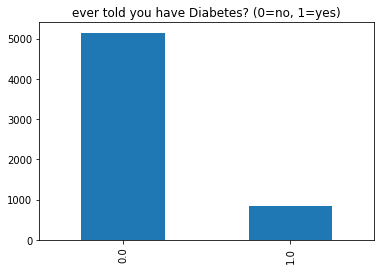

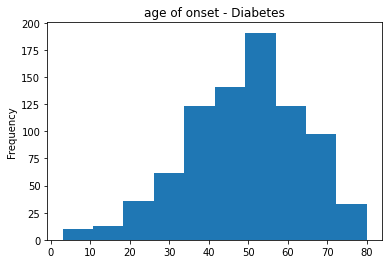

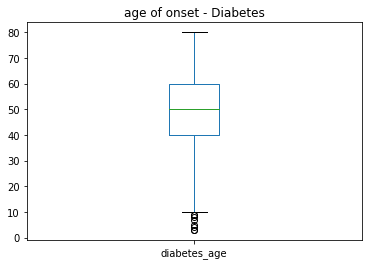

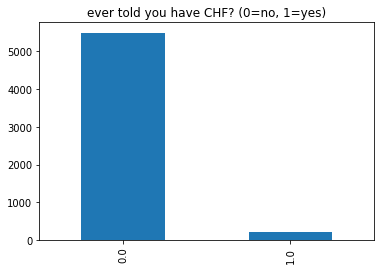

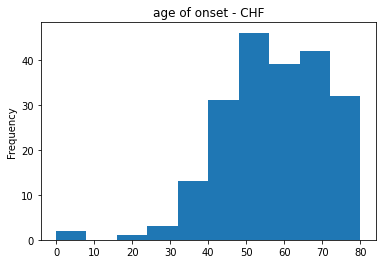

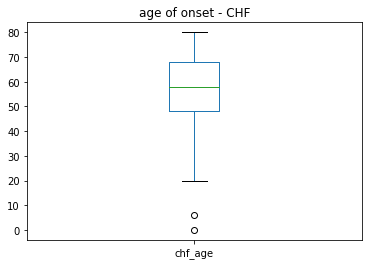

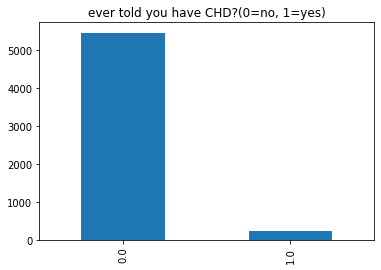

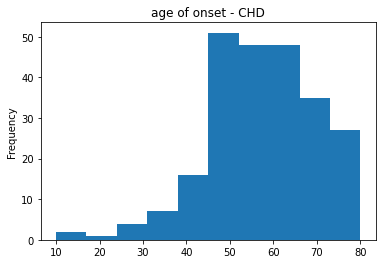

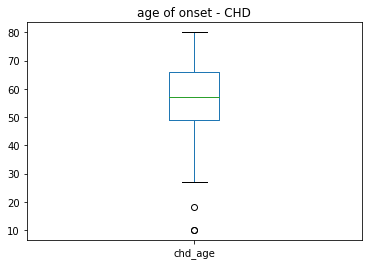

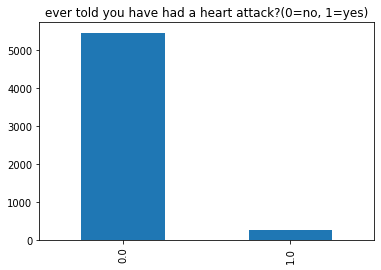

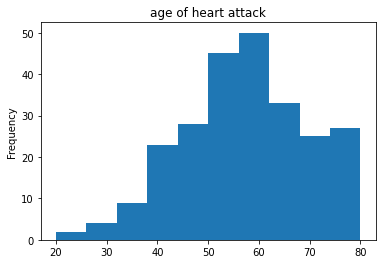

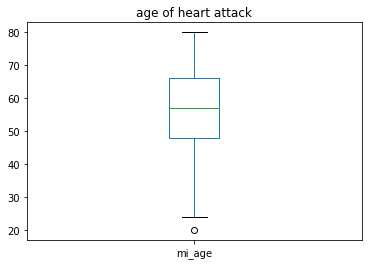

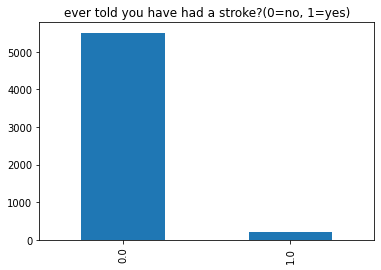

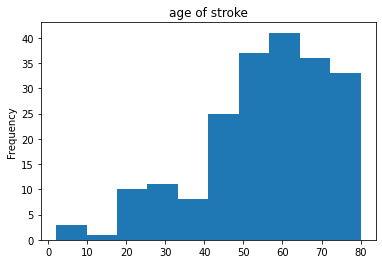

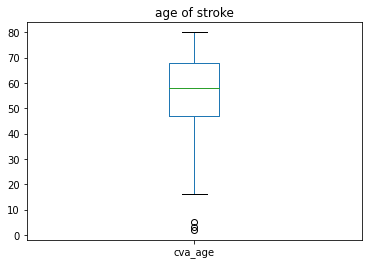

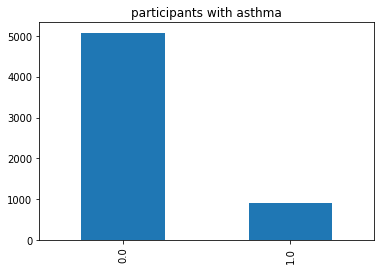

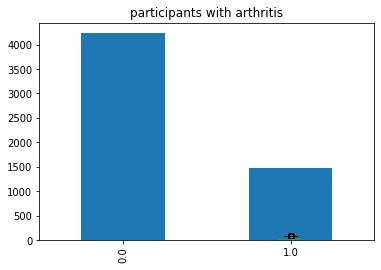

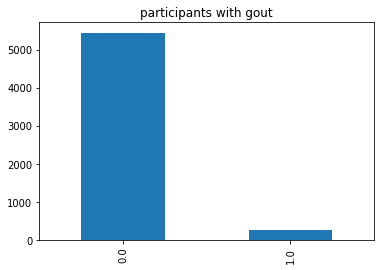

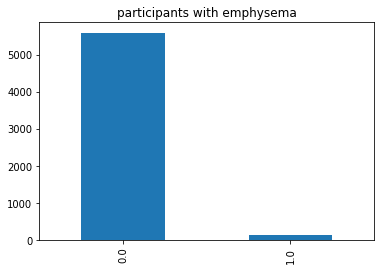

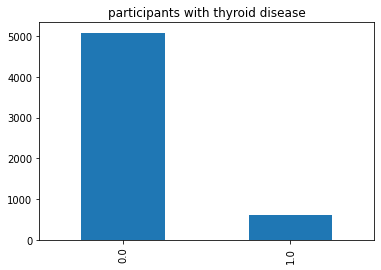

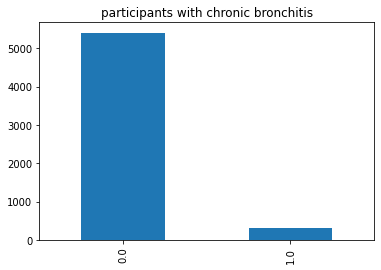

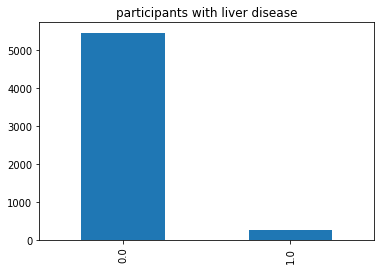

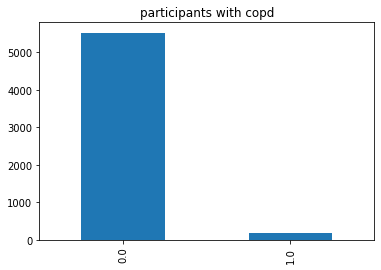

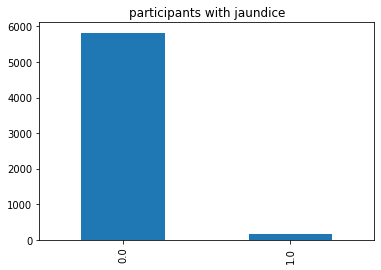

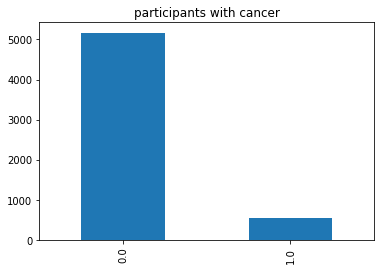

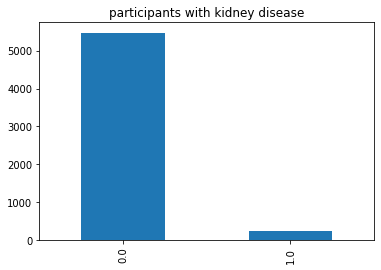

In [26]:
nhanes.diabetes.value_counts().plot(kind='bar', title='ever told you have Diabetes? (0=no, 1=yes)')
plt.show()
nhanes.diabetes_age.plot(kind='hist', title='age of onset - Diabetes')
plt.show()
nhanes.diabetes_age.plot(kind='box', title='age of onset - Diabetes')
plt.show()

nhanes.chf.value_counts().plot(kind='bar', title='ever told you have CHF? (0=no, 1=yes)')
plt.show()
nhanes.chf_age.plot(kind='hist', title='age of onset - CHF')
plt.show()
nhanes.chf_age.plot(kind='box', title='age of onset - CHF')
plt.show()

nhanes.chd.value_counts().plot(kind='bar', title='ever told you have CHD?(0=no, 1=yes)')
plt.show()
nhanes.chd_age.plot(kind='hist', title='age of onset - CHD')
plt.show()
nhanes.chd_age.plot(kind='box', title='age of onset - CHD')
plt.show()

nhanes.mi.value_counts().plot(kind='bar', title='ever told you have had a heart attack?(0=no, 1=yes)')
plt.show()
nhanes.mi_age.plot(kind='hist', title= 'age of heart attack')
plt.show()
nhanes.mi_age.plot(kind='box', title= 'age of heart attack')
plt.show()


nhanes.cva.value_counts().plot(kind='bar', title='ever told you have had a stroke?(0=no, 1=yes)')
plt.show()
nhanes.cva_age.plot(kind='hist', title= 'age of stroke')
plt.show()
nhanes.cva_age.plot(kind='box', title= 'age of stroke')
plt.show()


nhanes.asthma.value_counts().plot(kind='bar', title='participants with asthma')
plt.show()
nhanes.asthma_age.plot(kind='box', title='age on onset - asthma')


nhanes.arthritis.value_counts().plot(kind='bar', title='participants with arthritis')
plt.show()

nhanes.gout.value_counts().plot(kind='bar', title='participants with gout')
plt.show()

nhanes.emphysema.value_counts().plot(kind='bar', title='participants with emphysema')
plt.show()

nhanes.thyroid.value_counts().plot(kind='bar', title='participants with thyroid disease')
plt.show()

nhanes.bronchitis.value_counts().plot(kind='bar', title='participants with chronic bronchitis')
plt.show()

nhanes.liver.value_counts().plot(kind='bar', title='participants with liver disease')
plt.show()

nhanes.copd.value_counts().plot(kind='bar', title='participants with copd')
plt.show()

nhanes.jaundice.value_counts().plot(kind='bar', title='participants with jaundice')
plt.show()

nhanes.cancer.value_counts().plot(kind='bar', title='participants with cancer')
plt.show()

nhanes.kidney.value_counts().plot(kind='bar', title='participants with kidney disease')
plt.show()



#### Distribution of  demographic/ethnicity, depression and food security data.

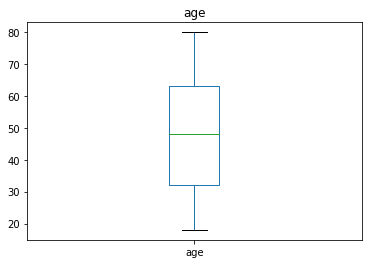

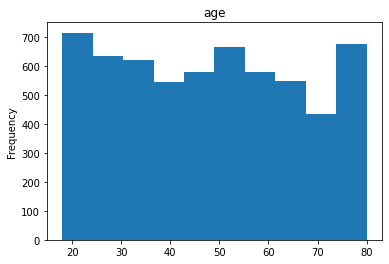

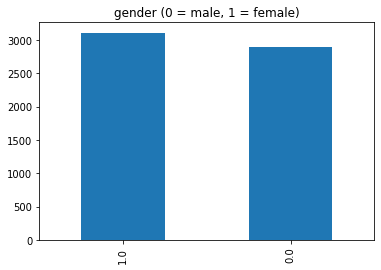

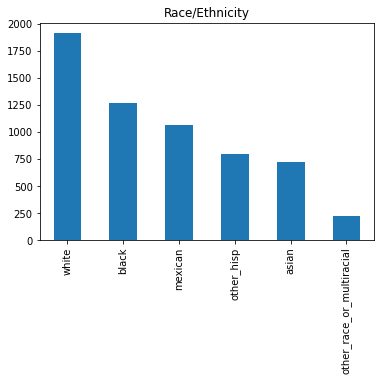

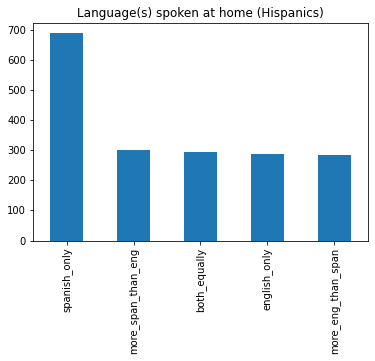

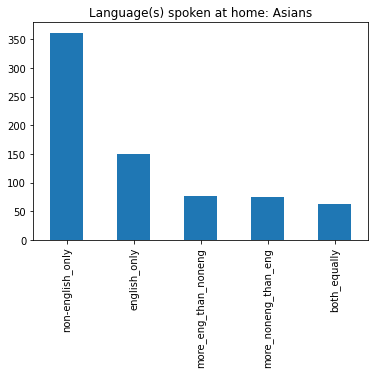

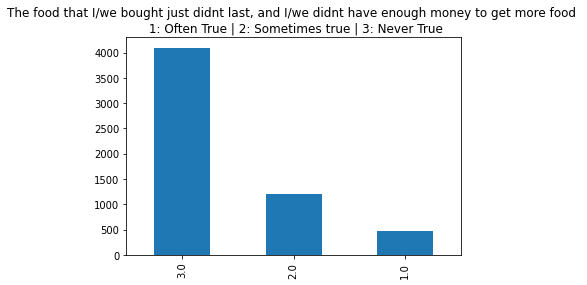

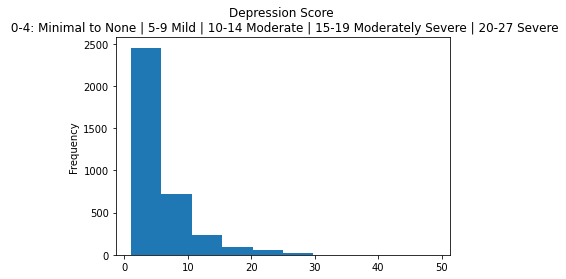

In [27]:
nhanes.age.plot(kind='box', title='age')
plt.show()
nhanes.age.plot(kind='hist', title='age')
plt.show()
nhanes.gender.value_counts().plot(kind='bar', title='gender (0 = male, 1 = female)')
plt.show()
nhanes.ethnicity.value_counts().plot(kind='bar', title='Race/Ethnicity')
plt.show()
nhanes.lang_hisp.value_counts().plot(kind='bar', title='Language(s) spoken at home (Hispanics)')
plt.show()
nhanes.lang_asian.value_counts().plot(kind='bar', title='Language(s) spoken at home: Asians')
plt.show()
nhanes.foodsec.value_counts().plot(kind='bar', title='The food that I/we bought just didn''t last, and I/we didn''t have enough money to get more food \n 1: Often True | 2: Sometimes true | 3: Never True')
plt.show()
nhanes.depr_score.plot(kind='hist', title='Depression Score \n 0-4: Minimal to None | 5-9 Mild | 10-14 Moderate | 15-19 Moderately Severe | 20-27 Severe')
plt.show()                        

#### Exploration of physical exam and laboratory data.

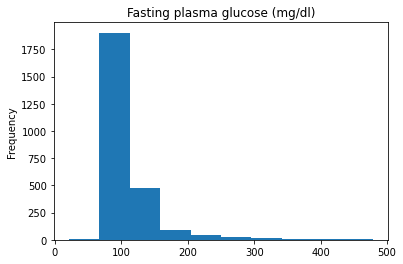

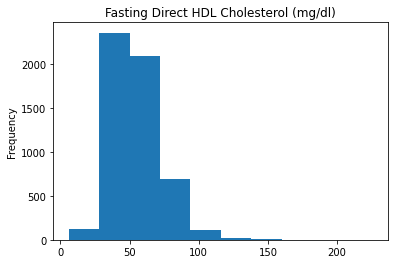

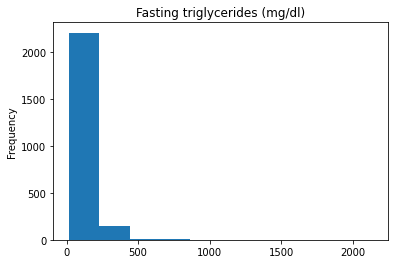

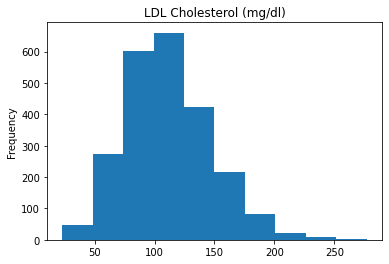

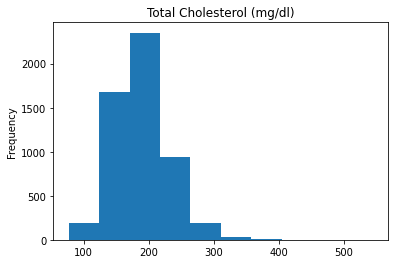

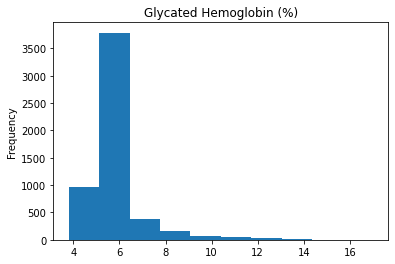

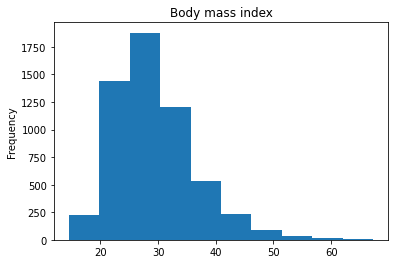

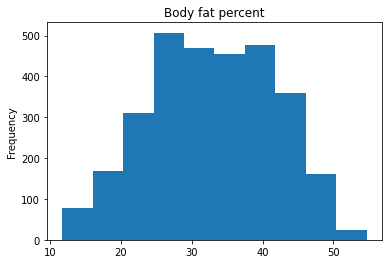

In [28]:
nhanes.fglucose.plot(kind='hist', title="Fasting plasma glucose (mg/dl)")
plt.show()
nhanes.hdl.plot(kind='hist', title='Fasting Direct HDL Cholesterol (mg/dl)')
plt.show()
nhanes.tg.plot(kind='hist', title='Fasting triglycerides (mg/dl)')
plt.show()
nhanes.ldl.plot(kind='hist', title='LDL Cholesterol (mg/dl)')
plt.show()
nhanes.tchol.plot(kind='hist', title='Total Cholesterol (mg/dl)')
plt.show()
nhanes.hgba1c.plot(kind='hist', title='Glycated Hemoglobin (%)')
plt.show()
nhanes.bmi.plot(kind='hist', title='Body mass index')
plt.show()
nhanes.bodyfatpct.plot(kind='hist', title='Body fat percent')
plt.show()


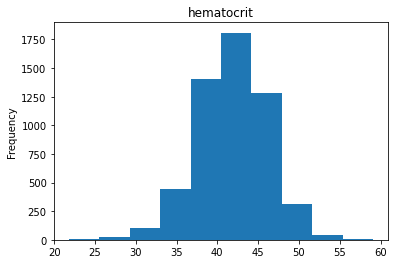

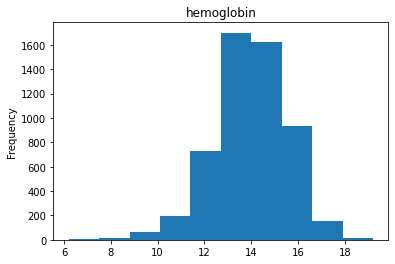

In [29]:
nhanes.hct.plot(kind='hist', title='hematocrit')
plt.show()
nhanes.hgb.plot(kind='hist', title='hemoglobin')
plt.show()

#### Visualization of 'number of overnight hospital stays in last year'

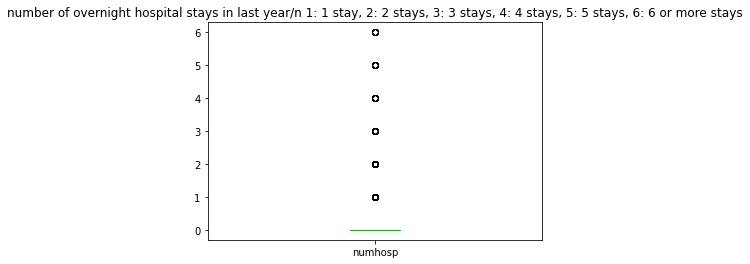

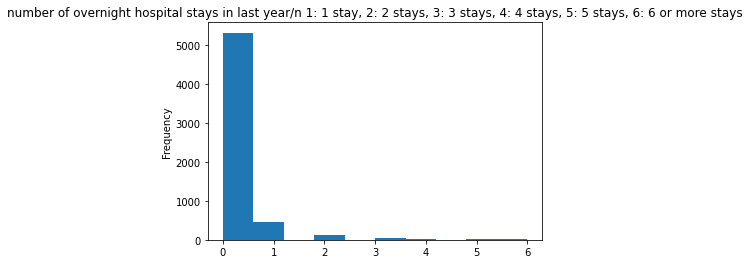

In [30]:
nhanes.numhosp.plot(kind='box', title='number of overnight hospital stays in last year/n 1: 1 stay, 2: 2 stays, 3: 3 stays, 4: 4 stays, 5: 5 stays, 6: 6 or more stays')
plt.show()
nhanes.numhosp.plot(kind='hist', title='number of overnight hospital stays in last year/n 1: 1 stay, 2: 2 stays, 3: 3 stays, 4: 4 stays, 5: 5 stays, 6: 6 or more stays')
plt.show()


Text(0.5, 1.0, 'Frequency of hospitalization by number of hospital stays (0, 1, 2)')

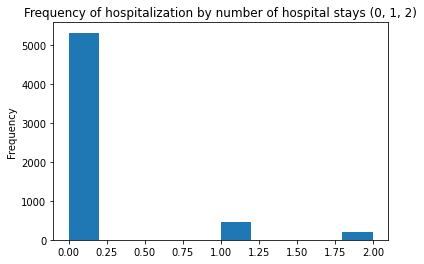

In [31]:
nhanes.numhosp_new.plot(kind='hist')
plt.title("Frequency of hospitalization by number of hospital stays (0, 1, 2)")


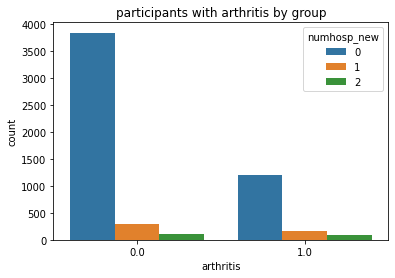

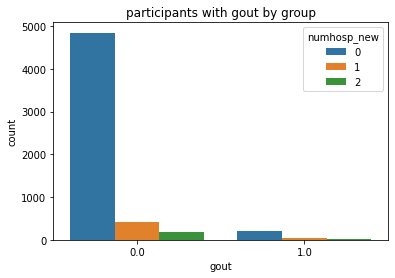

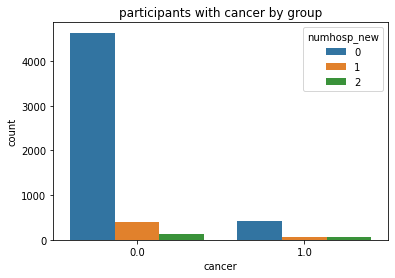

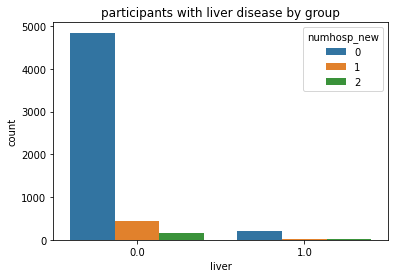

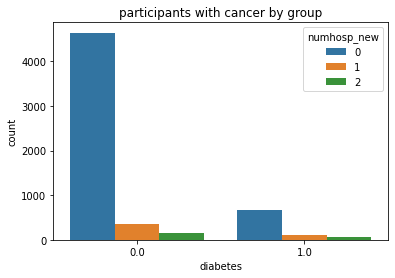

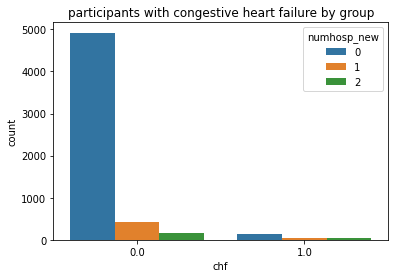

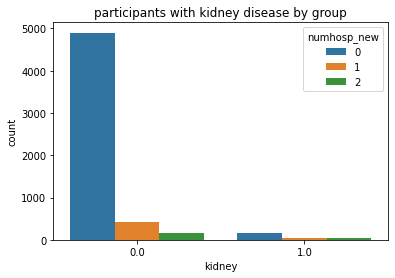

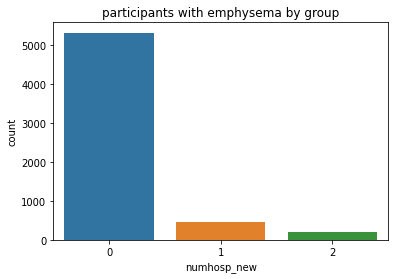

In [32]:
import seaborn as sns
color=sns.xkcd_rgb["slate blue"]

sns.countplot(data = nhanes, x='arthritis', hue='numhosp_new')
plt.title('participants with arthritis by group')
plt.show()

sns.countplot(data=nhanes, x='gout', hue='numhosp_new')
plt.title('participants with gout by group')
plt.show()

sns.countplot(data = nhanes, x='cancer', hue='numhosp_new')
plt.title('participants with cancer by group')
plt.show()

sns.countplot(data=nhanes, x='liver', hue='numhosp_new')
plt.title('participants with liver disease by group')
plt.show()

sns.countplot(data = nhanes, x='diabetes', hue='numhosp_new')
plt.title('participants with cancer by group')
plt.show()

sns.countplot(data=nhanes, x='chf', hue='numhosp_new')
plt.title('participants with congestive heart failure by group')
plt.show()

sns.countplot(data = nhanes, x='kidney', hue='numhosp_new')
plt.title('participants with kidney disease by group')
plt.show()

sns.countplot(data=nhanes, x='numhosp_new')
plt.title('participants with emphysema by group')
plt.show()

In [33]:
nhanes.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 8990
Columns: 129 entries, seqn to numhosp_new
dtypes: category(4), float64(124), int64(1)
memory usage: 5.9 MB


In [34]:
pd.set_option('display.max_columns',200)

nhanes.describe()

,seqn,age,gender,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new
count,5992.000000,5992.000000,5992.000000,5662.000000,5164.000000,5164.000000,5164.000000,5162.000000,5162.000000,5162.000000,5161.000000,5161.000000,5161.000000,3579.000000,3012.000000,5766.000000,5988.000000,5005.000000,5987.000000,5708.000000,5711.000000,5708.000000,5693.000000,5701.000000,5710.000000,5714.000000,5712.000000,5708.000000,5704.000000,5707.000000,5712.000000,5982.000000,5714.000000,5711.000000,887.000000,1433.000000,263.000000,830.000000,209.000000,239.000000,131.000000,246.000000,205.000000,121.000000,610.000000,296.000000,256.000000,163.000000,22.000000,4.000000,1.0,13.000000,2.00000,32.000000,0.0,84.000000,22.000000,36.000000,2.000000,0.0,8.000000,0.0,13.000000,6.000000,15.00000,11.000000,44.000000,4.000000,0.0,21.000000,3.000000,97.000000,2.000000,44.000000,53.000000,0.0,4.000000,5992.000000,2573.000000,5394.000000,2363.000000,2339.000000,5394.000000,5441.000000,5423.000000,5422.000000,5422.000000,5422.000000,5.422000e+03,5422.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5439.000000,5423.000000,5423.000000,5423.000000,5386.000000,5385.000000,5386.000000,5386.000000,5385.000000,5387.000000,5387.000000,5384.000000,5378.000000,5387.000000,5385.000000,5382.000000,5387.000000,5386.000000,5383.000000,5387.000000,5386.000000,5387.000000,5384.000000,5386.000000,5.384000e+03,5383.000000,5384.000000,5384.000000,3579.000000,5992.000000
mean,88676.950935,48.121996,0.518191,29.382197,0.422541,0.346631,0.617157,0.783611,0.407400,0.248741,0.258865,0.168378,0.062779,0.290305,32.855644,2.628859,0.141116,0.098302,0.152163,0.257533,0.047452,0.037491,0.042860,0.023329,0.043958,0.036577,0.021884,0.108970,0.053296,0.045383,0.033964,0.027583,0.096080,0.041849,21.099211,49.081647,50.174905,48.933735,57.143541,57.029289,49.358779,56.662602,55.751220,52.776860,44.714754,35.324324,42.484375,24.895706,66.772727,42.000000,70.0,49.230769,70.50000,42.875000,NaN,55.464286,31.136364,58.500000,67.500000,NaN,57.750000,NaN,45.076923,54.000000,68.60000,48.000000,57.909091,61.500000,NaN,42.047619,47.666667,64.309278,53.500000,57.909091,60.358491,NaN,56.750000,0.170561,112.764866,54.134779,112.610664,111.394186,189.096218,5.822000,7.364503,31.027591,8.137403,57.297990,2.847510e+00,0.814367,4.742095,13.912299,41.836898,88.496515,29.413885,33.214948,13.823898,239.179974,8.367158,4.314779,70.002786,25.795767,25.224285,14.609656,24.463152,9.348023,192.009287,157.993492,103.228513,0.876449,2.872947,104.603304,28.346082,80.943526,3.940590,129.157631,138.642658,277.412519,3.697883,5.501207e-01,7.187628,155.264302,5.395877,5.054484,0.145861
std,2877.819691,18.521353,0.499711,7.095921,0.872461,0.719062,0.946989,0.931202,0.817394,0.661830,0.686266,0.578470,0.397585,0.616834,8.769377,0.628847,0.348170,0.297752,0.359209,0.437314,0.212623,0.189979,0.202558,0.150960,0.205020,0.187737,

In [35]:
nhanes.numhosp.value_counts()

0.0    5322
1.0     466
2.0     120
3.0      49
4.0      14
5.0      13
6.0       8
Name: numhosp, dtype: int64

In [36]:
nhanes.chf.value_counts()

0.0    5494
1.0     214
Name: chf, dtype: int64

In [37]:
nohosp = nhanes[nhanes['numhosp']==0]
print('Number of CHF with no hospitalizations: ', nohosp[nohosp.chf==True].shape[0])


hosp = nhanes[nhanes['numhosp']>=1]
print('Number of CHF with at least 1 hospitalization: ', hosp[hosp.chf==True].shape[0])

hosp1 = nhanes[nhanes['numhosp']==1]
print('Number of CHF with exactly 1 hospitalization: ', hosp1[hosp1.chf==True].shape[0])

hosp2 = nhanes[nhanes['numhosp']>=2]
print('Number of CHF with 2 or more hospitalizations: ', hosp2[hosp2.chf==True].shape[0])


Number of CHF with no hospitalizations:  136
Number of CHF with at least 1 hospitalization:  78
Number of CHF with exactly 1 hospitalization:  39
Number of CHF with 2 or more hospitalizations:  39


In [38]:
pd.set_option('display.max_columns',200)
hosp2.describe()

,seqn,age,gender,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new
count,204.000000,204.000000,204.000000,189.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,145.000000,62.000000,195.000000,203.000000,145.000000,204.000000,196.000000,196.000000,194.000000,194.000000,195.000000,195.000000,195.000000,195.000000,194.000000,196.000000,192.000000,195.000000,204.000000,195.000000,195.000000,53.000000,86.000000,25.000000,55.000000,38.000000,33.000000,10.000000,31.000000,20.000000,20.000000,30.000000,20.00000,22.000000,9.000000,7.000000,1.0,0.0,1.0,0.0,1.0,0.0,6.000000,1.0,9.000000,0.0,0.0,2.00000,0.0,1.0,2.000000,4.000000,1.0,2.00000,1.0,0.0,1.0,1.0,10.000000,0.0,2.00000,2.00000,0.0,0.0,204.000000,78.000000,177.000000,70.000000,69.000000,177.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,176.000000,175.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,175.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,145.000000,204.0
mean,88646.588235,56.147059,0.544118,30.901587,0.754491,0.670659,1.119760,1.287425,0.700599,0.479042,0.497006,0.479042,0.173653,0.524138,36.506452,2.425641,0.280788,0.137931,0.259804,0.459184,0.127551,0.201031,0.170103,0.051282,0.158974,0.107692,0.102564,0.154639,0.107143,0.119792,0.143590,0.044118,0.282051,0.184615,31.509434,46.755814,52.280000,52.254545,59.868421,59.030303,59.300000,59.548387,63.300000,53.300000,50.633333,45.80000,48.363636,23.444444,55.285714,54.0,NaN,55.0,NaN,65.0,NaN,52.500000,30.0,57.777778,NaN,NaN,53.50000,NaN,26.0,59.500000,71.500000,65.0,71.50000,66.0,NaN,50.0,40.0,63.900000,NaN,71.50000,62.50000,NaN,NaN,2.725490,125.269231,52.892655,112.142857,101.956522,178.231638,6.068156,7.893855,27.498324,8.454749,60.322346,3.007821,0.846369,4.541006,13.073743,39.811732,88.008380,28.881006,32.791061,14.946369,243.530726,8.329050,4.100568,83.811429,24.977273,23.005682,18.261364,24.681818,9.335227,180.380682,114.130682,102.494318,1.123239,3.051136,116.284091,45.153409,67.680000,4.022159,139.187500,138.744318,279.562500,3.760795,0.523750,7.151705,150.562500,5.670455,7.620690,2.0
std,2968.613572,19.255552,0.499275,7.679376,1.044014,0.990577,1.307082,1.064780,0.972607,0.949561,0.890879,0.890636,0.580632,0.850513,7.745879,0.738038,0.450495,0.346023,0.439606,0.499607,0.334443,0.401808,0.376695,0.221140,0.366593,0.310789,0.304170,0.362496,0.310087,0.325567,0.351576,0.205862,0.451156,0.388984,21.259950,17.476664,15.836456,14.059685,13.977146,12.578466,11.860766,13.720638,11.425272,15.218064,18.679665,19.75801,16.921515,12.063489,24.763645,NaN,NaN,NaN,NaN,NaN,NaN,10.968136,NaN,9.795124,NaN,NaN,

In [39]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 8990
Columns: 129 entries, seqn to numhosp_new
dtypes: category(4), float64(124), int64(1)
memory usage: 5.9 MB


#### The initial objective of this project was to identify ways to reduce number of hospital readmissions related to new onset congestive heart failure (CHF). 
Here, we create a column that indicates whether participants had onset of CHF during the year of the study. We will then examine how many of these were hospitalized and readmitted.

In [40]:
#
chf_count = nhanes[nhanes['chf']==True].shape[0]
print('Total number of CHF: ', chf_count)

nhanes['new_chf'] = nhanes['chf_age'] == nhanes['age']
new_chf_count = nhanes[nhanes['new_chf']==True].shape[0]
print('Total number of new onset CHF in year of study: ', new_chf_count)


hosp['new_chf'] = hosp['chf_age'] == hosp['age']
anyhosp_value_counts = hosp[hosp['new_chf']==True].shape[0]
print('Number of new onset CHF with 1 or more hospital stays this year: ', anyhosp_value_counts)


hosp1['new_chf'] = hosp1['chf_age'] == hosp1['age']
negative_readmission_value_counts = hosp1[hosp1.new_chf==True].shape[0]
print('Number of new onset CHF with 1 hospital stay: ',negative_readmission_value_counts)

hosp2['new_chf'] = hosp2['chf_age'] == hosp2['age']
positive_readmission_value_counts = hosp2[hosp2.new_chf==True].shape[0]
print('Number of new onset CHF with 2 or more hospital stays this year: ',positive_readmission_value_counts)





Total number of CHF:  214
Total number of new onset CHF in year of study:  30
Number of new onset CHF with 1 or more hospital stays this year:  20
Number of new onset CHF with 1 hospital stay:  9
Number of new onset CHF with 2 or more hospital stays this year:  11


C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

#### Feature Engineering
In attempt to get a larger sample of participants with cardiovascular disease, we create a new variable, cvd_onset_age
&emsp;'cvd_onset_age' = age of onset of cardiovascular disease, here defined as the earliest onset age out of any of the following variables: <br>
&emsp;&emsp;&emsp;'cvd_age' ,  'chd_age' ,  'angina_age' ,  'stroke_age' ,  'heartattack_age'


In [41]:
hosp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 11 to 8986
Columns: 130 entries, seqn to new_chf
dtypes: bool(1), category(4), float64(124), int64(1)
memory usage: 663.5 KB


In [42]:
cvd = nhanes[['chd', 'chf', 'angina', 'mi', 'cva']]
nhanes['cvd'] = np.nan


def f(row):
    if row['chd'] == 1:
        val = 1
    elif row['chf'] == 1:
        val = 1
    elif row['angina'] == 1:
        val = 1
    elif row['mi'] == 1:
        val = 1
    elif row['cva'] == 1:
        val = 1
    else:
        val = 0
    return val

nhanes['cvd'] = nhanes.apply(f, axis=1)


cvd_count = nhanes[nhanes['cvd'] ==True].shape[0]
print('Total number of with CVD: ', cvd_count)
nhanes.head()

Total number of with CVD:  635


,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,new_chf,cvd
0,83732.0,62.0,0.0,white,NaN,english,NaN,27.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,40.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,0.0,NaN,46.0,NaN,NaN,173.0,7.0,9.8,23.9,8.2,63.5,4.0,0.5,4.93,15.2,44.7,90.8,30.8,34.0,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,2.9,94.0,22.0,70.0,4.30,110.0,136.0,272.0,4.7,0.5,7.5,158.0,4.2,1.0,0,False,0
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,30.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,101.0,63.0,147.0,173.0,265.0,5.5,7.3,31.3,9.7,54.8,2.6,1.8,4.89,17.5,49.7,101.8,35.8,35.1,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,2.9,94.0,75.0,161.0,4.55,108.0,140.0,278.0,4.4,0.6,7.4,170.0,7.0,2.0,0,False,0
2,83734.0,78.0,0.0,white,NaN,english,NaN,28.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,60.0,55.0,NaN,52.0,NaN,NaN,NaN,58.0,NaN,59.0,39.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,0.0,84.0,30.0,269.0,145.0,229.0,5.8,4.4,29.9,9.6,55.8,3.9,0.9,4.18,12.4,37.9,90.8,29.6,32.6,14.7,223.0,9.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,2.8,103.0,11.0,72.0,4.70,151.0,140.0,284.0,3.6,0.5,7.3,299.0,7.3,2.0,0,False,1
3,83735.0,56.0,1.0,white,NaN,english,NaN,42.4,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,50.9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,61.0,NaN,NaN,174.0,5.6,6.1,17.1,10.3,68.7,3.1,0.9,4.54,12.8,40.1,88.3,28.2,31.9,13.1,280.0,9.1,3.8,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,2.3,63.0,19.0,43.0,4.08,172.0,141.0,279.0,3.8,0.3,6.1,93.0,5.4,13.0,0,False,0
4,83736.0,42.0,1.0,black,NaN,english,NaN,20.3,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,84.0,53.0,47.0,142.0,204.0,5.6,4.2,47.1,7.8,44.8,0.2,0.2,4.16,12.1,36.5,87.8,29.1,33.2,12.3,275.0,7.7,4.3

#### Feature Engineering
In attempt to get a larger sample of participants with cardiovascular disease, we create a new variable, cvd_onset_age
&emsp;'cvd_onset_age' = age of onset of cardiovascular disease, here defined as the earliest onset age out of any of the following variables: <br>
&emsp;&emsp;&emsp;'cvd_age' ,  'chd_age' ,  'angina_age' ,  'stroke_age' ,  'heartattack_age'
<br>
<br>
Then we will determine the number of hospital stays for new onset CVD to compare with new onset CHF


In [43]:
#creating 'cvd_onset_age'
cvd_onset_age=nhanes[['chd_age', 'chf_age', 'cva_age','angina_age','mi_age']].min(axis='columns')
nhanes['cvd_onset_age']=cvd_onset_age
cvd_onset_age_count = len(nhanes[nhanes['cvd_onset_age'] >0])
print('Total number of with CVD: ', cvd_onset_age_count)

Total number of with CVD:  624


In [44]:
hosp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 11 to 8960
Columns: 130 entries, seqn to new_chf
dtypes: bool(1), category(4), float64(124), int64(1)
memory usage: 202.5 KB


In [45]:

# Creating column indicating participants with onset of cvd at their current age at time of the study
nhanes['new_cvd'] = nhanes['cvd_onset_age'] == nhanes['age']
new_cvd_count = len(nhanes[nhanes['new_cvd']>0])
print('Total number of new onset CVD in year of study: ', new_cvd_count)


#adding cvd_onset_age and new_cvd to hosp, hosp1, and hosp2 dataframes:

#creating 'cvd_onset_age' in hosp dataset
cvd_onset_age=hosp[['chd_age', 'chf_age', 'cva_age','angina_age','mi_age']].min(axis=1)
hosp['cvd_onset_age']=cvd_onset_age
cvd_onset_age_count_hosp = len(hosp[hosp['cvd_onset_age']>0])
print('Total number of participants with CVD with NO hospital stays: ', cvd_onset_age_count_hosp)

# Creating column indicating participants with onset of cvd at their current age at time of the study
hosp['new_cvd'] = hosp['cvd_onset_age'] == hosp['age']
new_cvd_count_hosp = len(hosp[hosp['new_cvd']>0])
print('Total number of new onset CVD with 1 or more hospitalizations: ', new_cvd_count_hosp)

#creating 'cvd_onset_age' in hosp1 dataset
cvd_onset_age=hosp1[['chd_age', 'chf_age', 'cva_age','angina_age','mi_age']].min(axis=1)
hosp1['cvd_onset_age']=cvd_onset_age
cvd_onset_age_count_hosp1 = len(hosp1[hosp1['cvd_onset_age']>0])
print('Total number participants with CVD with exactly one hospitalization: ', cvd_onset_age_count_hosp1)

# Creating column indicating participants with onset of cvd at their current age at time of the study
hosp1['new_cvd'] = hosp1['cvd_onset_age'] == hosp1['age']
new_cvd_count_hosp1 = len(hosp1[hosp1['new_cvd']>0])
print('Total number of new onset CVD for exactly one hospitalization: ', new_cvd_count_hosp1)

#creating 'cvd_onset_age' in hosp2 dataset
cvd_onset_age=hosp2[['chd_age', 'chf_age', 'cva_age','angina_age','mi_age']].min(axis=1)
hosp2['cvd_onset_age']=cvd_onset_age
cvd_onset_age_count_hosp2 = len(hosp2[hosp2['cvd_onset_age']>0])
print('Total number of participants with CVD and 2 or more hospitalizations: ', cvd_onset_age_count_hosp2)

# Creating column indicating participants with onset of cvd at their current age at time of the study
hosp2['new_cvd'] = hosp2['cvd_onset_age'] == hosp2['age']
new_cvd_count_hosp2 = len(hosp2[hosp2['new_cvd']>0])
print('Total number of new onset CVD for 2 or more hospitalizations: ', new_cvd_count_hosp2)

Total number of new onset CVD in year of study:  63
Total number of participants with CVD with NO hospital stays:  175
Total number of new onset CVD with 1 or more hospitalizations:  38
Total number participants with CVD with exactly one hospitalization:  106
Total number of new onset CVD for exactly one hospitalization:  24
Total number of participants with CVD and 2 or more hospitalizations:  69
Total number of new onset CVD for 2 or more hospitalizations:  14


C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\caras\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

We find above that 63 of the 5929 NHANES participants were newly diagnosed with cardiovascular disease during the year of the study. We will do a little further analysis of these participants, but because this sample size is relatively small, we may not be able to draw much inference from those who were hospitalized.

In [46]:
nhanes.head()


,seqn,age,gender,ethnicity,lang_hisp,lang_nhb_nhw,lang_asian,bmi,depr1,depr2,depr3,depr4,depr5,depr6,depr7,depr8,depr9,depr10,bodyfatpct,foodsec,diabetes,prediabetes,asthma,arthritis,gout,chf,chd,angina,mi,cva,emphysema,thyroid,bronchitis,liver,copd,jaundice,cancer,kidney,asthma_age,arthritis_age,gout_age,diabetes_age,chf_age,chd_age,angina_age,mi_age,cva_age,emphysema_age,thyroid_age,bronchitis_age,liver_age,jaundice_age,ca_bladder_age,ca_testicular_age,ca_blood_age,ca_thyroid_age,ca_bone_age,ca_uterine_age,ca_brain_age,ca_breast_age,ca_cervical_age,ca_colon_age,ca_esophageal_age,ca_gallbladder_age,ca_kidney_age,ca_larynx_age,ca_leukemia_age,ca_liver_age,ca_lung_age,ca_hodgkins_age,ca_melanoma_age,ca_mouth_age,ca_nervous_age,ca_ovarian_age,ca_pancreatic_age,ca_prostate_age,ca_rectal_age,ca_skin_nonmelanoma_age,ca_skin_unknown_age,ca_softtissue_age,ca_stomach_age,numhosp,fglucose,hdl,tg,ldl,tchol,hgba1c,wbc,lymphocytes,monocytes,neutrophils,eosinophil,basophils,rbc,hgb,hct,mcv,mch,mchgb,rdw,plt,mpv,alb,alp,ast,alt,bun,bicarbonate,calcium,cholesterol,cpk,chlorine,creatinine,globulin,glucose,ggt,iron,potassium,ldh,sodium,osmolality,phosphorus,tbili,protein,triglycerides,uricacid,depr_score,numhosp_new,new_chf,cvd,cvd_onset_age,new_cvd
0,83732.0,62.0,0.0,white,NaN,english,NaN,27.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,40.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,58.0,NaN,NaN,NaN,0.0,NaN,46.0,NaN,NaN,173.0,7.0,9.8,23.9,8.2,63.5,4.0,0.5,4.93,15.2,44.7,90.8,30.8,34.0,13.9,181.0,8.3,4.6,52.0,21.0,25.0,13.0,25.0,9.8,172.0,203.0,100.0,0.90,2.9,94.0,22.0,70.0,4.30,110.0,136.0,272.0,4.7,0.5,7.5,158.0,4.2,1.0,0,False,0,NaN,False
1,83733.0,53.0,0.0,white,NaN,NaN,NaN,30.8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,101.0,63.0,147.0,173.0,265.0,5.5,7.3,31.3,9.7,54.8,2.6,1.8,4.89,17.5,49.7,101.8,35.8,35.1,13.4,170.0,9.6,4.5,47.0,31.0,35.0,10.0,27.0,9.8,267.0,91.0,103.0,1.05,2.9,94.0,75.0,161.0,4.55,108.0,140.0,278.0,4.4,0.6,7.4,170.0,7.0,2.0,0,False,0,NaN,False
2,83734.0,78.0,0.0,white,NaN,english,NaN,28.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,3.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,60.0,55.0,NaN,52.0,NaN,NaN,NaN,58.0,NaN,59.0,39.0,NaN,11.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.0,NaN,NaN,0.0,84.0,30.0,269.0,145.0,229.0,5.8,4.4,29.9,9.6,55.8,3.9,0.9,4.18,12.4,37.9,90.8,29.6,32.6,14.7,223.0,9.0,4.5,46.0,30.0,29.0,26.0,24.0,9.7,236.0,160.0,106.0,1.12,2.8,103.0,11.0,72.0,4.70,151.0,140.0,284.0,3.6,0.5,7.3,299.0,7.3,2.0,0,False,1,58.0,False
3,83735.0,56.0,1.0,white,NaN,english,NaN,42.4,1.0,1.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,0.0,50.9,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,61.0,NaN,NaN,174.0,5.6,6.1,17.1,10.3,68.7,3.1,0.9,4.54,12.8,40.1,88.3,28.2,31.9,13.1,280.0,9.1,3.8,65.0,23.0,26.0,13.0,24.0,8.9,179.0,66.0,106.0,0.96,2.3,63.0,19.0,43.0,4.08,172.0,141.0,279.0,3.8,0.3,6.1,93.0,5.4,13.0,0,False,0,NaN,False
4,83736.0,42.0,1.0,black,NaN,english,NaN,20.3,1.0,1.0,1.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,84.0,53.0,47.0,142.0,204.0,5.6,4.2,47.1,7.

### We determine that we should leave all outliers, since none of them were noticable errors.

### Last, the dataframe is saved to a csv file.

In [49]:
nhanes.to_csv('nhanes.csv', index=False)

In [50]:
nhanes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 8990
Columns: 133 entries, seqn to new_cvd
dtypes: bool(2), category(4), float64(125), int64(2)
memory usage: 6.0 MB
